Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
bike=pd.read_csv("bikes.csv")
bike.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


Exploring the Data [EDA]

In [3]:
bike.shape ,bike.columns

((191, 5),
 Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object'))

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
date           191 non-null object
temperature    191 non-null float64
humidity       191 non-null float64
windspeed      191 non-null float64
count          191 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.5+ KB


In [5]:
bike.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


Checking missing Value in data

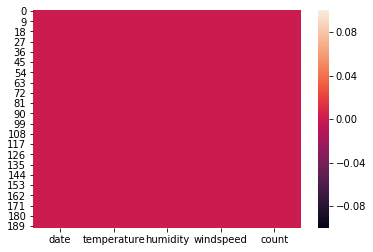

In [6]:
sns.heatmap(bike.isnull())

Distribution of variables

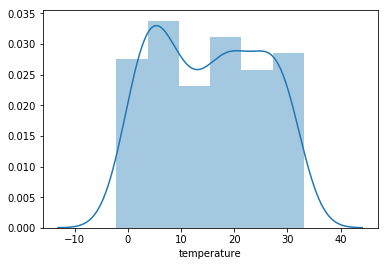

In [7]:
sns.distplot(bike["temperature"])

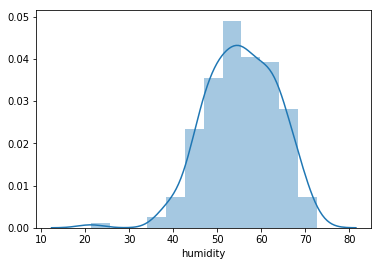

In [8]:
sns.distplot(bike["humidity"])

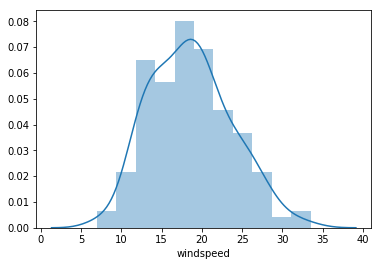

In [9]:
sns.distplot(bike['windspeed'])

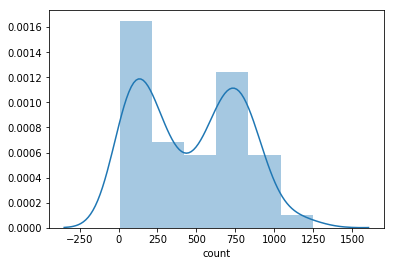

In [10]:
sns.distplot(bike['count'])

correlation

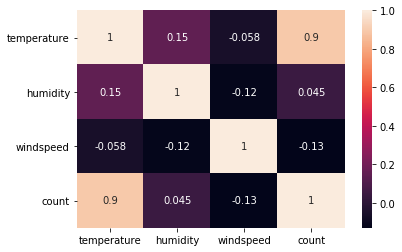

In [11]:
sns.heatmap(bike.corr(),annot=True)

Detecting Outlier

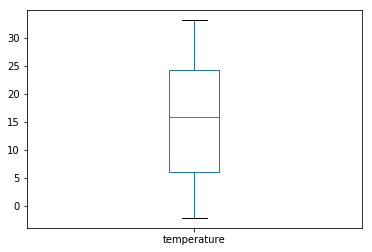

In [12]:
bike["temperature"].plot.box()

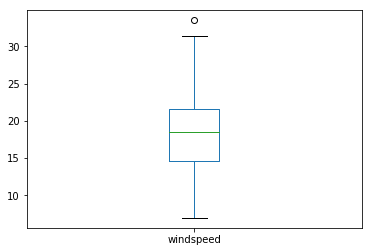

In [13]:
bike["windspeed"].plot.box()

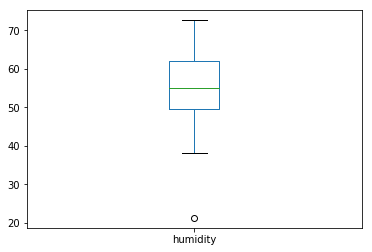

In [14]:
bike["humidity"].plot.box()

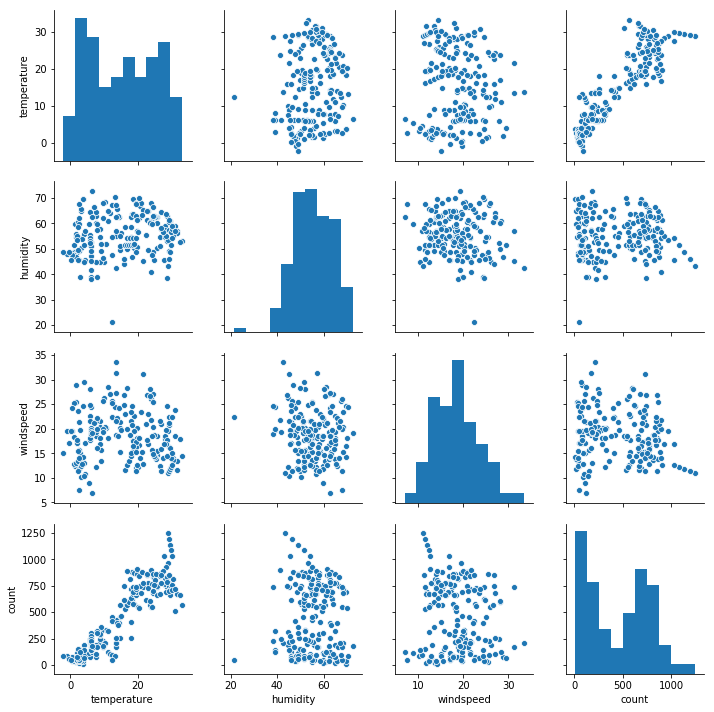

In [15]:
sns.pairplot(bike)

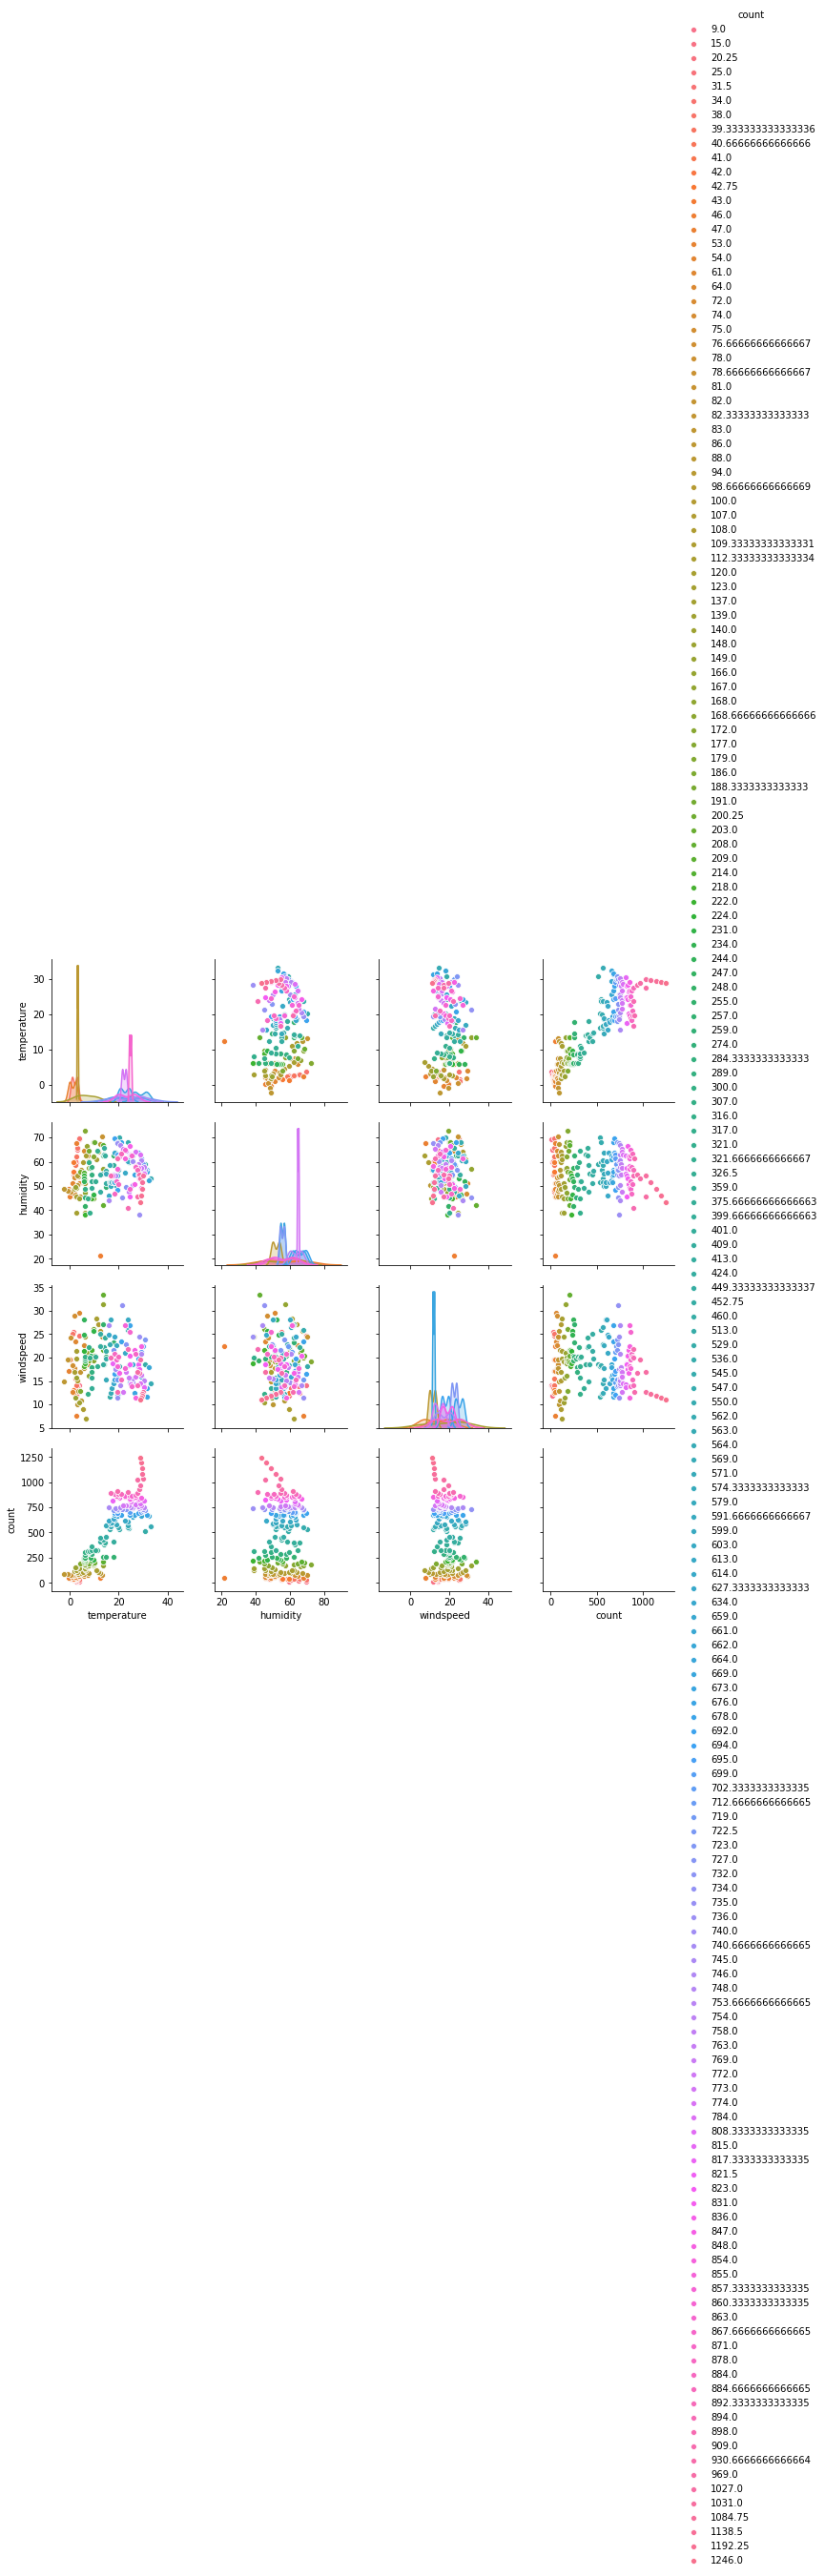

In [16]:
sns.pairplot(bike,hue="count")

Analysing the count variable with independent variables

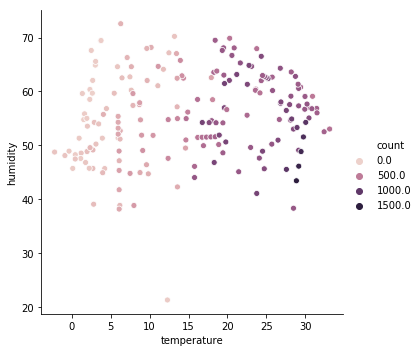

In [17]:
sns.relplot(x="temperature",y="humidity",hue="count",data=bike)

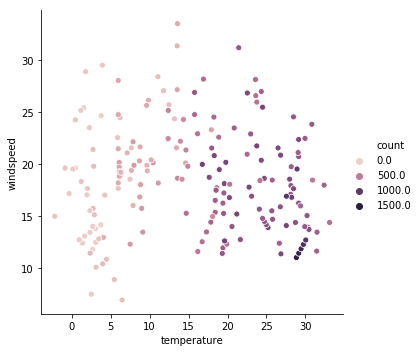

In [18]:
sns.relplot(x="temperature",y="windspeed",hue="count",data=bike)

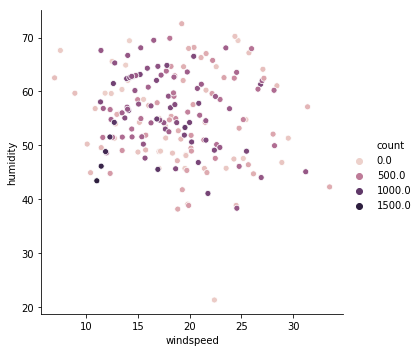

In [19]:
sns.relplot(x="windspeed",y="humidity",hue="count",data=bike)

Removing First column

In [20]:
bike.drop(['date'],axis=1,inplace=True)
bike.head()

,temperature,humidity,windspeed,count
0,2.716070,45.715346,21.414957,120.0
1,2.896673,54.267219,15.136882,108.0
2,4.235654,45.697702,17.034578,82.0
3,3.112643,50.237349,10.091568,88.0
4,2.723918,49.144928,15.738204,148.0


Removing Outlier

In [21]:
from scipy import stats
b=bike[(np.abs(stats.zscore(bike)) < 3).all(axis=1)]
b.shape

(190, 4)

In [22]:
x=b.iloc[:,:-1]
x.head()


,temperature,humidity,windspeed
0,2.716070,45.715346,21.414957
1,2.896673,54.267219,15.136882
2,4.235654,45.697702,17.034578
3,3.112643,50.237349,10.091568
4,2.723918,49.144928,15.738204


scaling independent variables

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [24]:
y=b.iloc[:,-1]
y.head()

0    120.0
1    108.0
2     82.0
3     88.0
4    148.0
Name: count, dtype: float64

split the data into train , test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=3)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(40, 3)
(150,)
(40,)


Applying LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pre))
print('MSE = ',mean_squared_error(y_test,pre))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pre)))
print('R2_score = ',r2_score(y_test,pre))
print('Training_score = ',lr.score(x_train,y_train))

MAE =  62.16047495275326
MSE =  7384.281474564761
RMSE =  85.9318420293942
R2_score =  0.9210321718941524
Training_score =  0.8091537037739713


Applying Lasso

In [30]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',la.score(x_train,y_train))

MAE =  64.41134773049605
MSE =  7805.097790022168
RMSE =  88.34646450210765
R2_score =  0.9165319438655161
Training_score =  0.8084755726648818


Applying Ridge

In [31]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(x_train,y_train)
pred=ri.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',ri.score(x_train,y_train))

MAE =  73.06094236605252
MSE =  9283.421580247294
RMSE =  96.35051416701052
R2_score =  0.900722684785483
Training_score =  0.8036583538245562


Applying ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred=en.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',en.score(x_train,y_train))

MAE =  237.10429596665372
MSE =  74942.07035194707
RMSE =  273.7554937383852
R2_score =  0.19856623155095687
Training_score =  0.20619550984662238


Applying KNeighborsRegressor

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=427)

In [34]:
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor(n_neighbors=5)
kr.fit(x_train,y_train)
pred=kr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',kr.score(x_train,y_train))

MAE =  56.59603174603175
MSE =  5373.053994708993
RMSE =  73.30111864568639
R2_score =  0.9538486148803765
Training_score =  0.8863450372332914


Applying DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',dtr.score(x_train,y_train))

MAE =  102.37255876839215
MSE =  17983.320135866677
RMSE =  134.1019020590934
R2_score =  0.8455338185439522
Training_score =  0.9449468940585511


Ensemble Technique

Applying GradientBoostingRegressor

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=211)

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',gbr.score(x_train,y_train))

MAE =  59.42739674305015
MSE =  5814.037196545291
RMSE =  76.2498340755263
R2_score =  0.9484580900866393
Training_score =  0.9824560953278166


Applying RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',rf.score(x_train,y_train))

MAE =  68.41937499999999
MSE =  7499.286602430555
RMSE =  86.59842147770682
R2_score =  0.9335182178217531
Training_score =  0.9765110261235997


Applying AdaBoostRegressor

In [39]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',adb.score(x_train,y_train))

MAE =  58.01709406534377
MSE =  5967.458587903338
RMSE =  77.24932742686721
R2_score =  0.9470979970454634
Training_score =  0.9284805896267136


Why I select KNeighborsRegressor as final Model

I get maximum R2_score in KNeighborsRegressor as compared to other model and we also achive the lowest Mean_Squared_Error in this model

KNeighborsRegressor

MAE =  56.59603174603175,
MSE =  5373.053994708993,
R2_score =  0.9538486148803765

Saving Model

In [40]:
from sklearn.externals import joblib

In [41]:
joblib.dump(kr,'model_bike_count_prediction')

['model_bike_count_prediction']

In [42]:
model=joblib.load('model_bike_count_prediction')

In [43]:
model.predict(x_test)

array([ 214.8       , 1060.4       ,   46.18333333,  641.33333333,
        208.        ,  833.66666667,  755.33333333,  218.        ,
         93.55      ,  673.73333333,  779.6       ,  181.53333333,
        779.        ,  781.6       ,  632.        ,  778.06666667,
        261.33333333,  130.8       ,   59.5       ,  653.46666667,
        165.6       ,  819.2       ,  233.73333333,   82.93333333,
        586.86666667,   99.4       ,   95.75      ,  245.73333333,
        763.8       ,  774.4       ,  762.06666667,  349.4       ,
        236.8       ,   34.58333333,  628.33333333,  164.4       ,
        195.18333333,   82.93333333,  841.86666667,  704.86666667])